# Linear Regression Assignment 

## Bike Rental Prediction Model

In [1]:
# Importing all the libraries that is needed for creating the Model
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import MinMaxScaler

In [2]:
# Changing the default number of rows and column to be displayed
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns' , None)

In [3]:
# Reading the csv File 
BB_Data = pd.read_csv('D:\\Desktop\\word of god\\march 2020\\UPGRAD JUPITER CODES\\Linear Regression\\day.csv')
BB_Data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Describing the Dataframe
BB_Data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Printing a concise summary of the dataframe 
BB_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Returning the column labels of the given dataframe
BB_Data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Displaying the No. of rows and columns
BB_Data.shape


(730, 16)

#### In the dataset there is no missing values found .


### Deleting instant , dteday , casual and registered columns as these columns are not useful in the Analysis .  


In [8]:
#Dropping Unnecessary columns which are not useful for Analysis
BB_Data.drop(['instant', 'dteday','casual', 'registered'] , axis=1, inplace=True)
BB_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [9]:
# Checking the Rows and column of the dataframe after dropping unnecessary columns 
BB_Data.shape

(730, 12)

## Categorical Variables

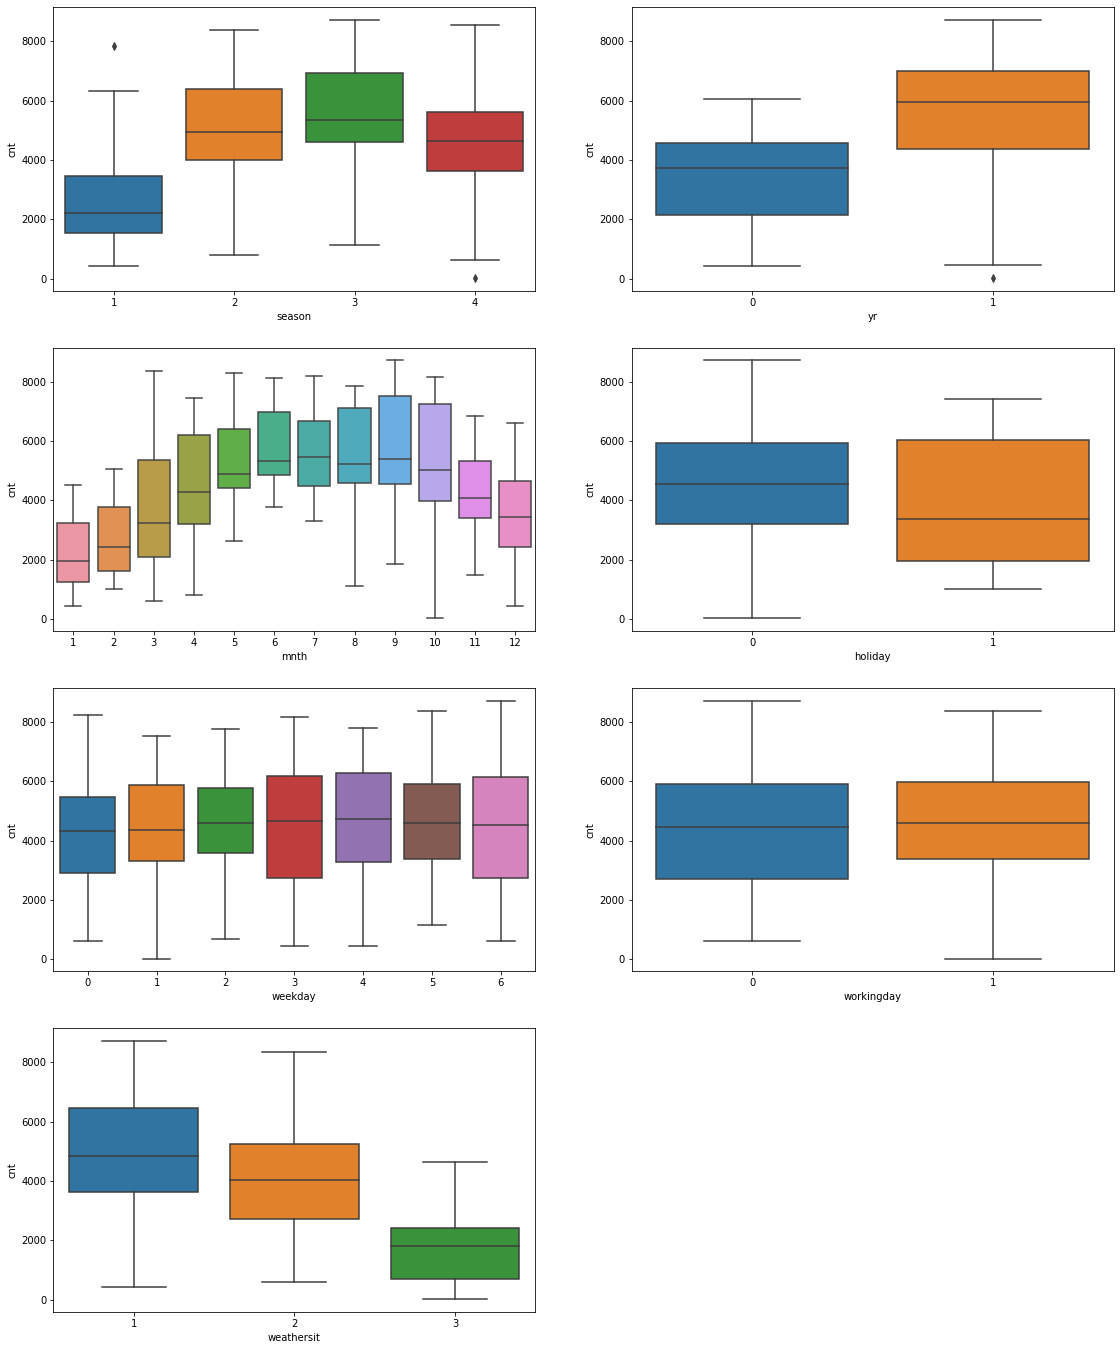

In [10]:
# Plotting Boxplot to visualize the Categorical Variables
Categorical_Cols= ['season' , 'yr' , 'mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(19,24))
for item in range(len(Categorical_Cols)):
    plt.subplot(4,2,item+1)
    sns.boxplot(x=Categorical_Cols[item] , y='cnt' , data=BB_Data)
plt.show()


1. Rental Bikes demand peaks during the summer and winter season
2. There is a increase in the cnt variable as year after year due to the popularity of the bike rentals.
3. weathersit 1 have high cnt as compared to 2 and 3 as people prefer rentals less on cloudy or rainy days as compared
   to sunny days.
4. There is a constant use of rental bikes on working day .
5. weekday dont have much effect on the rentals as compared to normal days 

## Numerical Columns

In [11]:
Numerical_Cols = ['temp','atemp' ,'hum' , 'windspeed' , 'cnt']
BB_Data[Numerical_Cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
temp         730 non-null float64
atemp        730 non-null float64
hum          730 non-null float64
windspeed    730 non-null float64
cnt          730 non-null int64
dtypes: float64(4), int64(1)
memory usage: 28.6 KB


In [12]:
# Checking the rows and columns of the dataframe
BB_Data[Numerical_Cols].shape

(730, 5)

In [13]:
# Describing the Numerical columns
BB_Data[Numerical_Cols].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


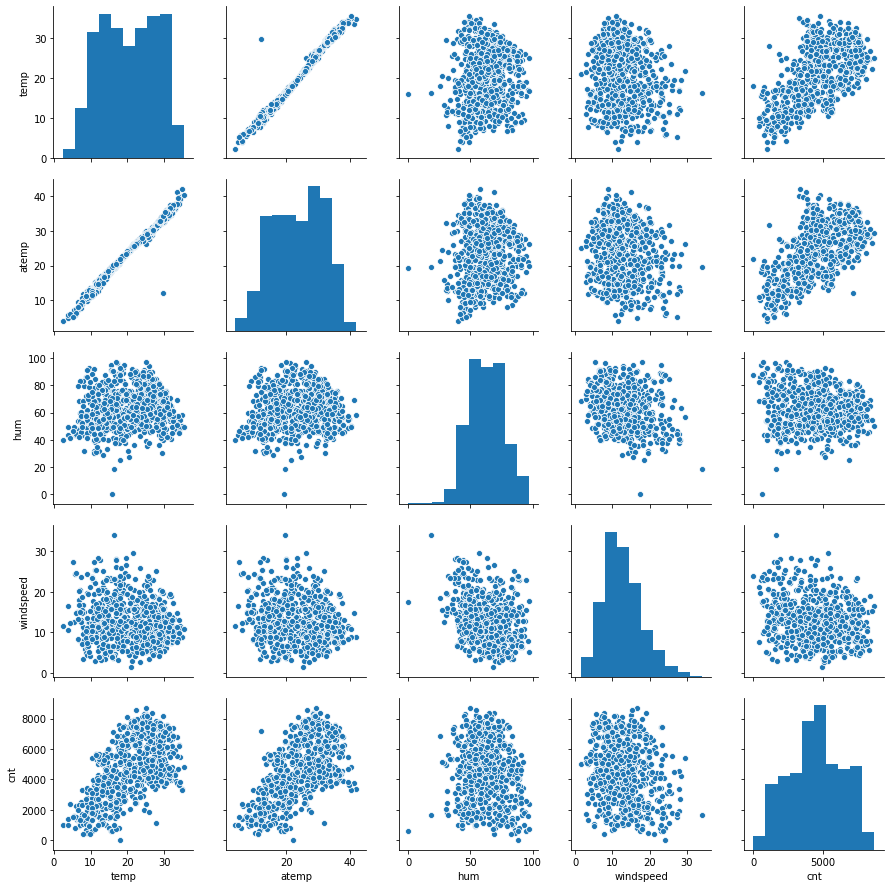

In [14]:
# Making Pairplot for  the Numerical Variables
sns.pairplot(BB_Data[Numerical_Cols])
plt.show()

#### From the above pairplot we get to know about the following below points :

1. There is more linear realtionship between temp,atemp and cnt variable
2. humidity is inversely proportional to cnt and there is no linear relationship between both of them .
3. There is not much linear relationship between windspeed and cnt

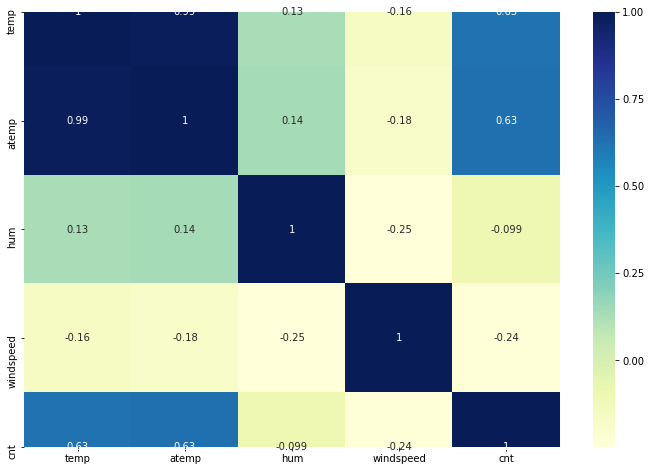

In [15]:
# Checking which variables are highly correlated by correlation coeeficient 

plt.figure(figsize = (12,8))
sns.heatmap(BB_Data[Numerical_Cols].corr() , annot = True , cmap = 'YlGnBu')
plt.show()


1. atemp and temp columns both has a high correlation of 0.63 with  'cnt' which is the target variable .
2. There are columns like temp and atemp which has a very  high correlation with themselves.

## Preparation of Data

In [16]:
# Checking the first couple of rows of the dataframe 
BB_Data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# Printing a concise summary of the dataframe
BB_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [18]:
# Converting the Categorical Variables into object type to create dummy variaables

Dummy_Cat_Var =['season','mnth','weekday','weathersit']

def Ojt_Tp(l):
    return l.astype(str)
BB_Data[Dummy_Cat_Var]= BB_Data[Dummy_Cat_Var].apply(Ojt_Tp)
BB_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [19]:
BB_Data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
# Naming the levels again before creating dummy variables for easy understanding 

def Season_Lvl(l):
    return l.map({'1':'SPRING' , '2':'SUMMER','3':'FALL','4':'WINTER' })
def Month_Lvl(l):
    return l.map({'1':'JAN','2':'FEB','3':'MAR','4':'APR','5':'MAY','6':'JUN','7':'JUL','8':'AUG','9':'SEP','10':'OCT','11':'NOV','12':'DEC'})
def WeekDay_Lvl(l):
    return l.map({'0':'SUN','1':'MON','2':'TUE','3':'WED','4':'THR','5':'FRI','6':'SAT'})
def WeatherSit_Lvl(l):
    return l.map({'1':'Weathersit_1','2':'Weathersit_2','3':'Weathersit_3','4':'Weathersit_4'})

BB_Data[['season']] = BB_Data[['season']].apply(Season_Lvl)
BB_Data[['mnth']] = BB_Data[['mnth']].apply(Month_Lvl)
BB_Data[['weekday']] = BB_Data[['weekday']].apply(WeekDay_Lvl)
BB_Data[['weathersit']] = BB_Data[['weathersit']].apply(WeatherSit_Lvl)



In [21]:
BB_Data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,SPRING,0,JAN,0,SAT,0,Weathersit_2,14.110847,18.18125,80.5833,10.749882,985
1,SPRING,0,JAN,0,SUN,0,Weathersit_2,14.902598,17.68695,69.6087,16.652113,801
2,SPRING,0,JAN,0,MON,1,Weathersit_1,8.050924,9.47025,43.7273,16.636703,1349
3,SPRING,0,JAN,0,TUE,1,Weathersit_1,8.200000,10.60610,59.0435,10.739832,1562
4,SPRING,0,JAN,0,WED,1,Weathersit_1,9.305237,11.46350,43.6957,12.522300,1600


## Dummy Variable Creation

In [22]:
# For all the categorical variables creating dummy variables

for x in Dummy_Cat_Var:
    position = pd.get_dummies(BB_Data[x], drop_first= True)
# Concat with the original dataframe
    BB_Data = pd.concat([BB_Data, position] , axis=1)
# Since we have created the dummy variables therefore dropping the categorical variables
    BB_Data.drop([x], axis=1 , inplace= True)
    

In [23]:
# Checking out the head of the Dataframe

BB_Data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,SPRING,SUMMER,WINTER,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,MON,SAT,SUN,THR,TUE,WED,Weathersit_2,Weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
BB_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr              730 non-null int64
holiday         730 non-null int64
workingday      730 non-null int64
temp            730 non-null float64
atemp           730 non-null float64
hum             730 non-null float64
windspeed       730 non-null float64
cnt             730 non-null int64
SPRING          730 non-null uint8
SUMMER          730 non-null uint8
WINTER          730 non-null uint8
AUG             730 non-null uint8
DEC             730 non-null uint8
FEB             730 non-null uint8
JAN             730 non-null uint8
JUL             730 non-null uint8
JUN             730 non-null uint8
MAR             730 non-null uint8
MAY             730 non-null uint8
NOV             730 non-null uint8
OCT             730 non-null uint8
SEP             730 non-null uint8
MON             730 non-null uint8
SAT             730 non-null uint8
SUN             730 non-null uint8
THR         

In [25]:
BB_Data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,SPRING,SUMMER,WINTER,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,MON,SAT,SUN,THR,TUE,WED,Weathersit_2,Weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.336986,0.028767
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
BB_Data.shape

(730, 30)

## Making the Training sets and Testing sets by splitting the Data

In [27]:
# Dividing the data into training and testing sets 
df_Train,df_Test = train_test_split(BB_Data, train_size=0.7, test_size=0.3 , random_state=100)

## Feature Rescaling

In [28]:
#Using MinMax scaling for Rescaling the features
SCALE = MinMaxScaler()
Numerical_Variable = ['temp','atemp','hum','windspeed','cnt']
df_Train[Numerical_Variable] = SCALE.fit_transform(df_Train[Numerical_Variable])


In [29]:
df_Train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,SPRING,SUMMER,WINTER,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP,MON,SAT,SUN,THR,TUE,WED,Weathersit_2,Weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# For the Model Building dividing into X and Y sets

Train_Y = df_Train.pop('cnt')
Train_X = df_Train

## Linear Regression Model Building

In [31]:
# Creating Linear Regression model using Mixed Approach

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

LM = LinearRegression()
LM.fit(Train_X, Train_Y)

# Executing RFE 
RFe = RFE(LM,15)
RFe = RFe.fit(Train_X , Train_Y)

list(zip(Train_X.columns,RFe.support_,RFe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('SPRING', True, 1),
 ('SUMMER', False, 11),
 ('WINTER', True, 1),
 ('AUG', True, 1),
 ('DEC', False, 2),
 ('FEB', False, 4),
 ('JAN', False, 3),
 ('JUL', True, 1),
 ('JUN', True, 1),
 ('MAR', False, 6),
 ('MAY', False, 14),
 ('NOV', True, 1),
 ('OCT', False, 5),
 ('SEP', False, 15),
 ('MON', False, 8),
 ('SAT', True, 1),
 ('SUN', False, 7),
 ('THR', False, 12),
 ('TUE', False, 9),
 ('WED', False, 13),
 ('Weathersit_2', True, 1),
 ('Weathersit_3', True, 1)]

In [32]:
Cln = Train_X.columns[RFe.support_]
Cln

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'SPRING',
       'WINTER', 'AUG', 'JUL', 'JUN', 'NOV', 'SAT', 'Weathersit_2',
       'Weathersit_3'],
      dtype='object')

In [33]:
Train_X.columns[~RFe.support_]

Index(['atemp', 'SUMMER', 'DEC', 'FEB', 'JAN', 'MAR', 'MAY', 'OCT', 'SEP',
       'MON', 'SUN', 'THR', 'TUE', 'WED'],
      dtype='object')

## For detailed statistics using statsmodel for building model

In [34]:
# Using RFE selected variables to make X_test dataframe

RFE_Train_X = Train_X[Cln]

# Inserting a constant variable

import statsmodels.api as sm
RFE_Train_X = sm.add_constant(RFE_Train_X)

# Executing the linear model

LM = sm.OLS(Train_Y, RFE_Train_X).fit()

# Summary of the linear model
print(LM.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.78e-189
Time:                        22:57:06   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     494   BIC:                            -931.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2904      0.033      8.868   

### Calculating the VIF 

In [35]:
NW_Train_X= RFE_Train_X
NW_Train_X = NW_Train_X.drop(['const'] , axis = 1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating the vif

VF = pd.DataFrame()
I = NW_Train_X
VF['FEATURES'] = I.columns
VF['VIF'] = [variance_inflation_factor(I.values, a) for a in range(I.shape[1])]
VF['VIF'] = round(VF['VIF'],3)
VF = VF.sort_values(by = 'VIF' , ascending = False)
VF

,FEATURES,VIF
4,hum,24.709
3,temp,22.173
2,workingday,5.196
5,windspeed,4.230
7,WINTER,2.670
6,SPRING,2.636
13,Weathersit_2,2.246
0,yr,2.069
12,SAT,1.944
9,JUL,1.788


#### Humidity is having high VIF so therefore it can be dropped

In [36]:
# Dropping hum column
NW_Train_X = NW_Train_X.drop(['hum'], axis=1)


## Building the model again 

In [37]:
# Building up the model
LM_X_Train = sm.add_constant(NW_Train_X)
Lm1 = sm.OLS(Train_Y, LM_X_Train).fit()
print(Lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.11e-186
Time:                        22:57:07   Log-Likelihood:                 505.30
No. Observations:                 510   AIC:                            -980.6
Df Residuals:                     495   BIC:                            -917.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1984      0.026      7.655   

In [38]:
# Calculating the VIF for the created new model 

VF = pd.DataFrame()
I = NW_Train_X
VF['FEATURES'] = I.columns
VF['VIF'] = [variance_inflation_factor(I.values, a) for a in range(I.shape[1])]
VF['VIF'] = round(VF['VIF'],3)
VF = VF.sort_values(by = 'VIF' , ascending = False)
VF

,FEATURES,VIF
3,temp,9.513
2,workingday,5.010
4,windspeed,4.230
6,WINTER,2.197
0,yr,2.064
11,SAT,1.908
5,SPRING,1.907
8,JUL,1.667
7,AUG,1.664
10,NOV,1.588


#### Since temp cannot be dropped therefore dropping the next high vif value that is working day

In [39]:
#Dropping working day and then checking the model
NW_Train_X = NW_Train_X.drop(['workingday'], axis=1)
LM_X_Train = sm.add_constant(NW_Train_X)
Lm2 = sm.OLS(Train_Y, LM_X_Train).fit()
print(Lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.84e-184
Time:                        22:57:07   Log-Likelihood:                 497.48
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     496   BIC:                            -907.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2357      0.024      9.637   

In [40]:
# Inspecting the VIF 
VF = pd.DataFrame()
I = NW_Train_X
VF['FEATURES'] = I.columns
VF['VIF'] = [variance_inflation_factor(I.values, a) for a in range(I.shape[1])]
VF['VIF'] = round(VF['VIF'],3)
VF = VF.sort_values(by = 'VIF' , ascending = False)
VF

,FEATURES,VIF
2,temp,6.881
3,windspeed,4.138
5,WINTER,2.149
0,yr,2.061
4,SPRING,1.695
6,AUG,1.658
7,JUL,1.642
9,NOV,1.584
11,Weathersit_2,1.536
8,JUN,1.479


Since the SAT feature is negligible therefore dropping it down.

In [41]:
# Dropping the SAT feature and inspecting the model
NW_Train_X = NW_Train_X.drop(['SAT'], axis=1)
LM_X_Train = sm.add_constant(NW_Train_X)
Lm3 = sm.OLS(Train_Y, LM_X_Train).fit()
print(Lm3.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.15e-184
Time:                        22:57:07   Log-Likelihood:                 495.64
No. Observations:                 510   AIC:                            -965.3
Df Residuals:                     497   BIC:                            -910.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2397      0.024      9.808   

In [42]:
# Examining the VIF
VF = pd.DataFrame()
I = NW_Train_X
VF['FEATURES'] = I.columns
VF['VIF'] = [variance_inflation_factor(I.values, a) for a in range(I.shape[1])]
VF['VIF'] = round(VF['VIF'],3)
VF = VF.sort_values(by = 'VIF' , ascending = False)
VF

,FEATURES,VIF
2,temp,6.864
3,windspeed,4.103
5,WINTER,2.134
0,yr,2.061
4,SPRING,1.682
6,AUG,1.656
7,JUL,1.641
9,NOV,1.583
10,Weathersit_2,1.535
8,JUN,1.478


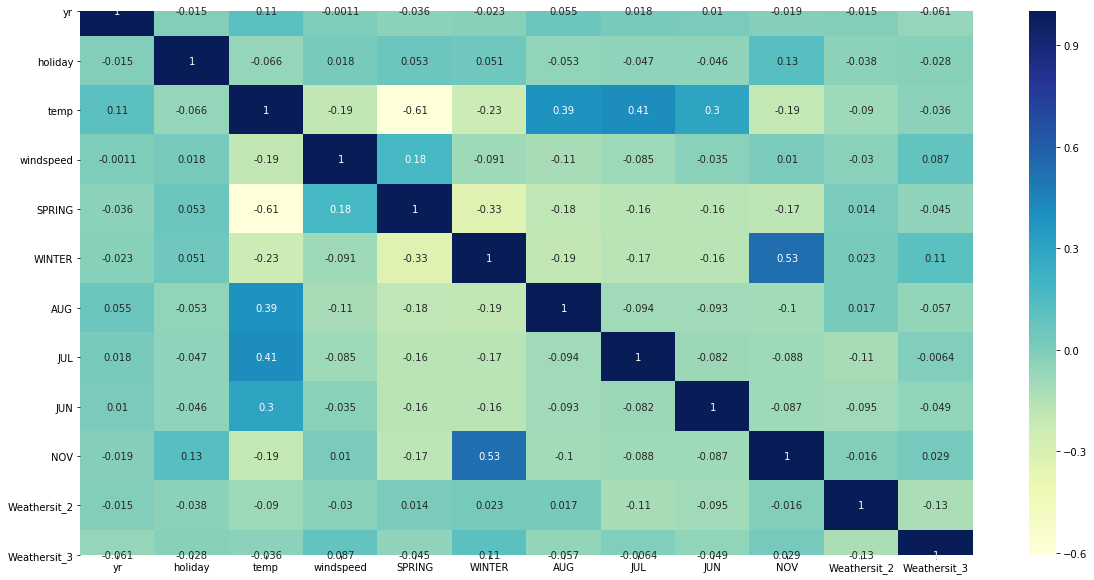

In [43]:
# Examining the heatmap to check the correlation coefficient to see which variables are highly correlated
plt.figure(figsize = (20,10))
sns.heatmap(NW_Train_X.corr() , annot = True , cmap = 'YlGnBu')
plt.show()

In [44]:
# Dropping Nov Column 
NW_Train_X = NW_Train_X.drop(['NOV'], axis=1)


In [45]:
#Inspecting the model
LM_X_Train = sm.add_constant(NW_Train_X)
Lm4 = sm.OLS(Train_Y, LM_X_Train).fit()
print(Lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.36e-185
Time:                        22:57:09   Log-Likelihood:                 494.46
No. Observations:                 510   AIC:                            -964.9
Df Residuals:                     498   BIC:                            -914.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2355      0.024      9.686   

In [46]:
# Examining the VIF
VF = pd.DataFrame()
I = NW_Train_X
VF['FEATURES'] = I.columns
VF['VIF'] = [variance_inflation_factor(I.values, a) for a in range(I.shape[1])]
VF['VIF'] = round(VF['VIF'],3)
VF = VF.sort_values(by = 'VIF' , ascending = False)
VF

,FEATURES,VIF
2,temp,6.773
3,windspeed,4.047
0,yr,2.060
4,SPRING,1.679
6,AUG,1.650
7,JUL,1.636
5,WINTER,1.569
9,Weathersit_2,1.535
8,JUN,1.475
10,Weathersit_3,1.081


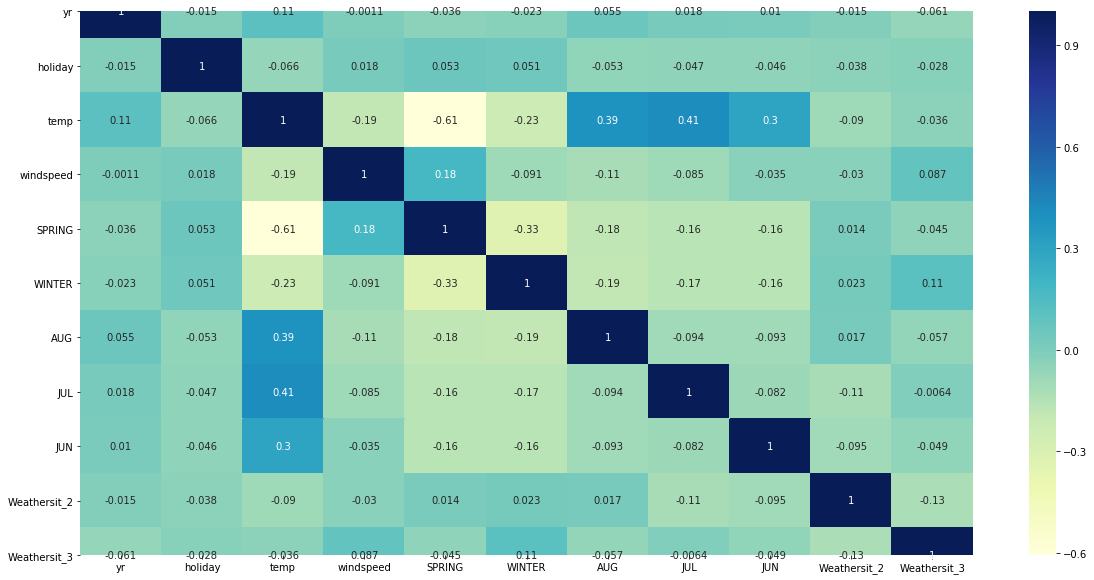

In [47]:
# Checking which variable is highly correlated by heatmap
plt.figure(figsize = (20,10))
sns.heatmap(NW_Train_X.corr() , annot = True , cmap = 'YlGnBu')
plt.show()

Since JUL has high correlation with temp therefore dropping JUL feature

In [48]:
#Dropping the JUL and then checking its effect on temp
NW_Train_X = NW_Train_X.drop(['JUL'], axis=1)
LM_X_Train = sm.add_constant(NW_Train_X)
Lm5 = sm.OLS(Train_Y, LM_X_Train).fit()
print(Lm5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.85e-179
Time:                        22:57:10   Log-Likelihood:                 476.70
No. Observations:                 510   AIC:                            -931.4
Df Residuals:                     499   BIC:                            -884.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2664      0.025     10.837   

In [49]:
# Checking the VIF
VF = pd.DataFrame()
I = NW_Train_X
VF['FEATURES'] = I.columns
VF['VIF'] = [variance_inflation_factor(I.values, a) for a in range(I.shape[1])]
VF['VIF'] = round(VF['VIF'],3)
VF = VF.sort_values(by = 'VIF' , ascending = False)
VF

,FEATURES,VIF
2,temp,4.666
3,windspeed,3.950
0,yr,2.053
4,SPRING,1.666
8,Weathersit_2,1.500
5,WINTER,1.460
6,AUG,1.406
7,JUN,1.294
9,Weathersit_3,1.081
1,holiday,1.040


We can see the drastic drop of vif value of temp after dropping JUL feature

#### Some of the variables are not needed in the model therefore performing correlation of these variables with cnt variable

In [50]:
Corr_Train_X = pd.concat([NW_Train_X , Train_Y] , axis = 1)
Corr_Train_X.head()




,yr,holiday,temp,windspeed,SPRING,WINTER,AUG,JUN,Weathersit_2,Weathersit_3,cnt
653,1,0,0.509887,0.300794,0,1,0,0,0,0,0.864243
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0.827658
426,1,0,0.442393,0.255342,1,0,0,0,1,0,0.465255
728,1,0,0.245101,0.663106,1,0,0,0,0,0,0.204096
482,1,0,0.395666,0.188475,0,0,0,0,1,0,0.482973


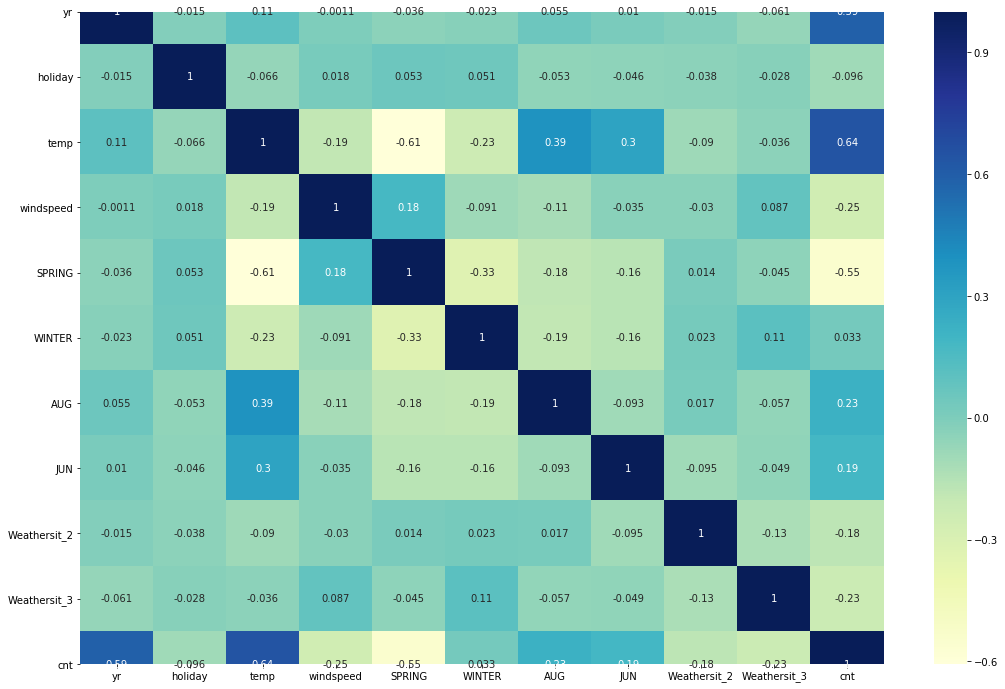

In [51]:
#Checking the correlation with the target variable that is 'cnt'
plt.figure(figsize = (18,12))
sns.heatmap(Corr_Train_X.corr() , annot = True , cmap = 'YlGnBu')
plt.show()

   Winter has least correlation with the cnt variable(0.033) . 

In [52]:
# Dropping Winter Feature and then checking the model 

NW_Train_X = NW_Train_X.drop(['WINTER'], axis=1)

LM_X_Train = sm.add_constant(NW_Train_X)
Lm6 = sm.OLS(Train_Y, LM_X_Train).fit()
print(Lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     246.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.24e-177
Time:                        22:57:12   Log-Likelihood:                 470.52
No. Observations:                 510   AIC:                            -921.0
Df Residuals:                     500   BIC:                            -878.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3190      0.020     16.219   

In [53]:
# Checking the VIF
VF = pd.DataFrame()
I = NW_Train_X
VF['FEATURES'] = I.columns
VF['VIF'] = [variance_inflation_factor(I.values, a) for a in range(I.shape[1])]
VF['VIF'] = round(VF['VIF'],3)
VF = VF.sort_values(by = 'VIF' , ascending = False)
VF

,FEATURES,VIF
2,temp,4.630
3,windspeed,3.784
0,yr,2.024
4,SPRING,1.522
7,Weathersit_2,1.469
5,AUG,1.344
6,JUN,1.250
8,Weathersit_3,1.066
1,holiday,1.033


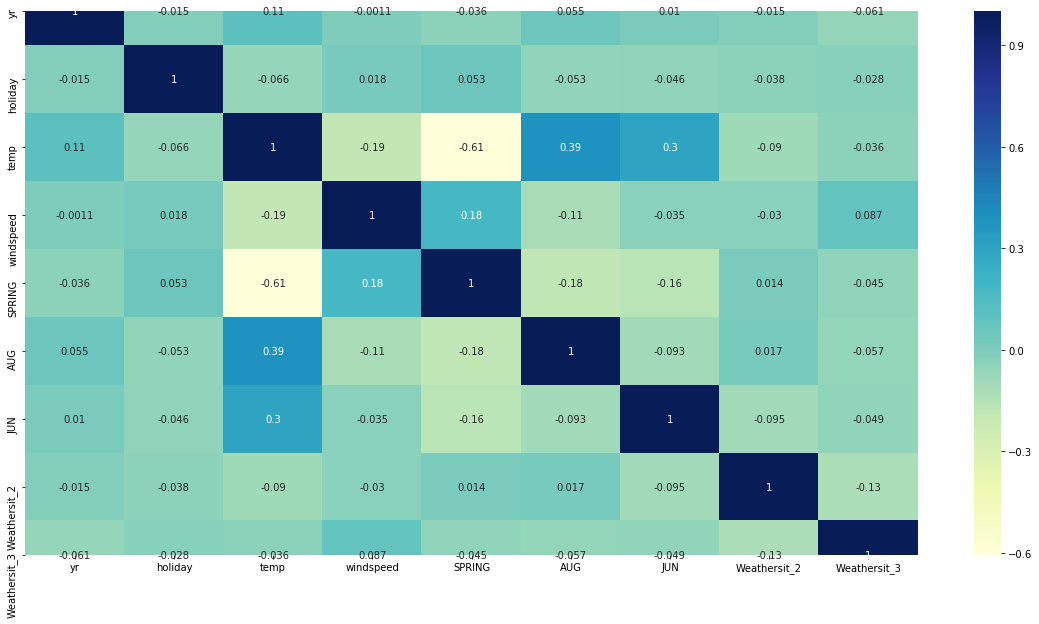

In [54]:
# Checking the correlation coefficient to see which feature has high correlation with temp
plt.figure(figsize = (20,10))
sns.heatmap(NW_Train_X.corr() , annot = True , cmap = 'YlGnBu')
plt.show()

Since AUG feature has high correlation with temp , So dropping the AUG feature and then checking its effect on vif of temp


In [55]:
#Dropping the AUG feature
NW_Train_X = NW_Train_X.drop(['AUG'], axis=1)


In [56]:
#Checking the Model
LM_X_Train = sm.add_constant(NW_Train_X)
Lm6 = sm.OLS(Train_Y, LM_X_Train).fit()
print(Lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     277.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.72e-178
Time:                        22:57:13   Log-Likelihood:                 469.63
No. Observations:                 510   AIC:                            -921.3
Df Residuals:                     501   BIC:                            -883.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3242      0.019     16.802   

In [57]:
# Inspecting the VIF
VF = pd.DataFrame()
I = NW_Train_X
VF['FEATURES'] = I.columns
VF['VIF'] = [variance_inflation_factor(I.values, a) for a in range(I.shape[1])]
VF['VIF'] = round(VF['VIF'],3)
VF = VF.sort_values(by = 'VIF' , ascending = False)
VF

,FEATURES,VIF
2,temp,3.856
3,windspeed,3.697
0,yr,2.023
4,SPRING,1.521
6,Weathersit_2,1.469
5,JUN,1.190
7,Weathersit_3,1.062
1,holiday,1.030


VIF of temp comes down after the removal of AUG feature

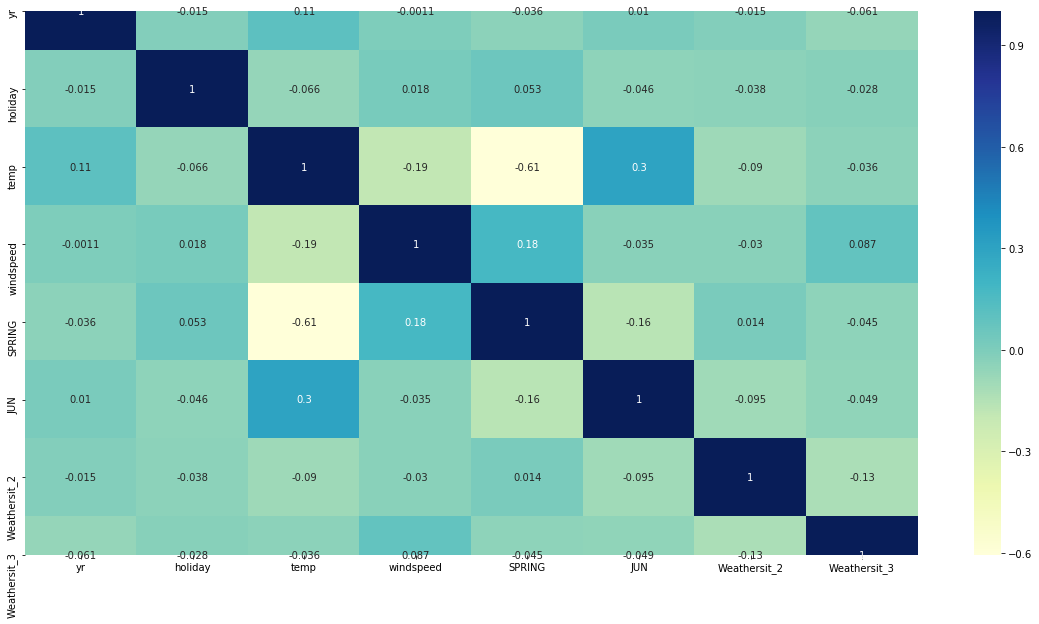

In [58]:
#Checking the correlation with temp using heatmap
plt.figure(figsize = (20,10))
sns.heatmap(NW_Train_X.corr() , annot = True , cmap = 'YlGnBu')
plt.show()

Since JUN has high correlation of 0.3 with temp therefore dropping it down and then checking the vif 


In [59]:
# Dropping the JUN feature 
NW_Train_X = NW_Train_X.drop(['JUN'], axis=1)


In [60]:
#Inspecting the model
LM_X_Train = sm.add_constant(NW_Train_X)
Lm7 = sm.OLS(Train_Y, LM_X_Train).fit()
print(Lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     317.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.00e-179
Time:                        22:57:14   Log-Likelihood:                 469.56
No. Observations:                 510   AIC:                            -923.1
Df Residuals:                     502   BIC:                            -889.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3249      0.019     16.939   

In [61]:
# VIF Checking
VF = pd.DataFrame()
I = NW_Train_X
VF['FEATURES'] = I.columns
VF['VIF'] = [variance_inflation_factor(I.values, a) for a in range(I.shape[1])]
VF['VIF'] = round(VF['VIF'],3)
VF = VF.sort_values(by = 'VIF' , ascending = False)
VF

,FEATURES,VIF
3,windspeed,3.693
2,temp,3.521
0,yr,2.019
4,SPRING,1.518
5,Weathersit_2,1.451
6,Weathersit_3,1.058
1,holiday,1.028


Since windspeed has high VIF , therefore dropping the windspeed feature

In [62]:
#Dropping the windspeed feature
NW_Train_X = NW_Train_X.drop(['windspeed'], axis=1)


In [63]:
# Checking Model
LM_X_Train = sm.add_constant(NW_Train_X)
Lm8 = sm.OLS(Train_Y, LM_X_Train).fit()
print(Lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     340.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.99e-173
Time:                        22:57:15   Log-Likelihood:                 451.78
No. Observations:                 510   AIC:                            -889.6
Df Residuals:                     503   BIC:                            -859.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2690      0.017     15.494   

In [64]:
# VIF Checking
VF = pd.DataFrame()
I = NW_Train_X
VF['FEATURES'] = I.columns
VF['VIF'] = [variance_inflation_factor(I.values, a) for a in range(I.shape[1])]
VF['VIF'] = round(VF['VIF'],3)
VF = VF.sort_values(by = 'VIF' , ascending = False)
VF

,FEATURES,VIF
2,temp,2.212
0,yr,1.995
4,Weathersit_2,1.430
3,SPRING,1.177
5,Weathersit_3,1.031
1,holiday,1.026


There are 6 variables in the model

1. R-squared          :  0.802
2. Adj. R-squared     :  0.800
3. F-statistic        :  340.1
4. Prob (F-statistic) :  1.99e-173

# Analyzing the Model

### Residual Analysis

Plotting the histogram of the error terms to check if it is normally distributed .

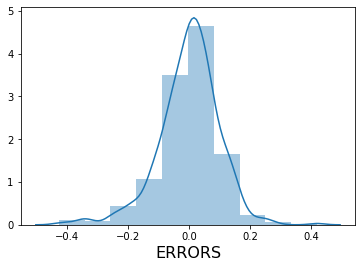

In [65]:
Train_CNT_Y = Lm8.predict(LM_X_Train)

#Plotting the histogram of Error terms

Figure = plt.figure()
sns.distplot((Train_Y- Train_CNT_Y) , bins = 10)
plt.xlabel('ERRORS', fontsize = 16)
plt.show()


In [66]:
Numerical_Variable = ['temp','atemp','hum','windspeed','cnt']
df_Test[Numerical_Variable] = SCALE.transform(df_Test[Numerical_Variable])

#### Dividing into Test_X and Test_Y

In [67]:
Test_Y = df_Test.pop('cnt')
Test_X = df_Test

### Using the Model to make prediction 


In [68]:
# Dropping variables from Test_X to craete a new dataframe 

NW_Test_X = Test_X[NW_Train_X.columns]

# Constant Variable Addition 

NW_Test_X = sm.add_constant(NW_Test_X)

Pdt_Y= Lm8.predict(NW_Test_X)


## Evaluating the Model 


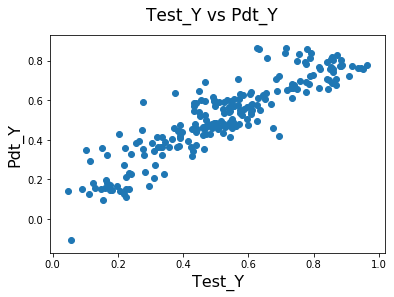

In [69]:
Figure = plt.figure()
plt.scatter(Test_Y , Pdt_Y)
Figure.suptitle('Test_Y vs Pdt_Y', fontsize= 17)
plt.xlabel('Test_Y', fontsize = 16)
plt.ylabel('Pdt_Y', fontsize = 16)

plt.show()

In [70]:
from sklearn.metrics import r2_score
r2_score(Test_Y, Pdt_Y)

0.7985644068080201

# Final Model 


In [71]:
Lm8.params

const           0.268991
yr              0.234986
holiday        -0.084064
temp            0.373434
SPRING         -0.160352
Weathersit_2   -0.075047
Weathersit_3   -0.287550
dtype: float64

In [72]:
LM_Dict = Lm8.params.to_dict()
del LM_Dict['const']

In [73]:
coefficient = str(round(Lm8.params[0],3))

In [74]:
rst = ['(' + k + ' * ' + str(round(LM_Dict.get(k),3)) + ')' for k in LM_Dict]
rst = 'cnt = ( ' + coefficient + ' + ' + ' + '.join(rst) + " )" 
rst

'cnt = ( 0.269 + (yr * 0.235) + (holiday * -0.084) + (temp * 0.373) + (SPRING * -0.16) + (Weathersit_2 * -0.075) + (Weathersit_3 * -0.288) )'

## Following are the outcomes of the Linear Regression Model 

###  cnt on being affected by positive features

1. The cnt will increase as the year increases. As the year passes by or increases there is an increase in the cnt variable of    bike rental because of the acceptance , demand and positive word of mouth from the general public about the Bike rental year    on year.

2. By predicting the cnt variable there is a positive impact on the temperature . There is an increase in the cnt of bike          rental as Temperature increases which shows that increase in temperature is directly proportional to the increase of the cnt    variable .

### cnt on being affected by negative features

1. There will be less cnt variable on spring as compared to other seasons.Spring season has a negative effect on the cnt as the    Demand for bike decreases during the spring season.

2. People dont use Rental bikes if weather is similar to Weathersit_2 i.e, ,Mist, Cloudy. Weathersit_2 (Mist + Cloudy, Mist)      has negative effect on cnt , As there is very less count in casual and registered rental bikes during Cloudy and misty          weather as people don’t rent Bikes at this weather.

3. People dont use Rental bikes if weather is similar to Weathersit_3 like Scattered Clouds, Thunderstorms , Light Rain , Light    snow. Weathersit_3 (Light Snow, Light Rain + Thunderstorm ) too has negative impact in the cnt as during the weather of        Light snow, light rain + Thunderstorm people normally don’t go outside due to bad weather therefore it leads to the negative    Effect on cnt of bike rentals.

4. Holiday is having negative effect on the cnt variable as People don’t prefer to go outside on a holiday so therefore There      is a negative drop in cnt on holidays.

Model is having 6 Variable with

1. R-squared      : 0.802
2. Adj. R-squared : 0.800

In [75]:
r2_score(Test_Y, Pdt_Y)

0.7985644068080201